# Looking closely at SHAP

## Linear Explainer
**A unified measure of feature importance.**

William Harding william.harding@avanade.com </br>
Manager, Advanced Analytics</br>
Data and AI COE</br>

In [1]:
#standards
import pandas as pd
import numpy as np
import altair as alt
import IPython

#stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

#Shap
import shap
shap.initjs()

#datasets
from sklearn import datasets
boston = datasets.load_boston()

# Looking at the PJX Experience Dataset

In [3]:
filepath = r"C:\Users\william.harding\Documents\repos\pjxpipelines\pipes\data\ex_cx_ff_latest_normalized_backfill.csv"

In [37]:
df = pd.read_csv(filepath,index_col=0).drop(columns='Unnamed: 0').drop(columns=['backfill','created_date_utc','factset_last_update','fysm_id_active_flag','currency']).drop_duplicates()
df.head()

,cx_Q1,cx_Q2,cx_Q3,cx_Q4,cx_Q5,cx_Q6,cx_Q7,cx_Q8,cx_Q8b,cx_Q9,...,ticker_region,ticker,factset_industry_desc,factset_sector_desc,ff_sales,ff_oper_inc,ff_sales_gr,ff_ebitda_cf,ff_for_assets_pct,ff_for_inc_pct
fsym_id,,,,,,,,,,,,,,,,,,,,,
BDQDB8-R,0.492635,-0.017416,-0.544686,-1.621928,-1.586027,-0.829014,4.121287e-01,-0.983348,0.116249,-1.716031,...,DG-US,DG,Discount Stores,Retail Trade,-1.800740,-1.419510,-0.919896,-1.560826,0.00000,0.000000
BL5KVX-R,1.853659,1.325301,1.200000,0.684730,0.754717,0.685894,-3.552714e-15,-0.227273,0.682353,0.425532,...,COST-US,COST,Specialty Stores,Retail Trade,-0.812585,-0.982229,-0.952377,-1.023884,29.15859,35.338822
BRWKF0-R,0.780488,0.602410,0.720000,0.472590,0.188679,0.861108,2.083333e-01,-0.090909,0.494118,0.638298,...,TSCO-US,TSCO,Specialty Stores,Retail Trade,-1.938484,-1.652599,-0.923733,-1.797324,0.00000,0.000000
BV3N5V-R,-0.829268,-1.036145,0.080000,-0.800252,-0.943396,-0.496801,-2.083333e-01,-0.090909,-0.305882,-1.489362,...,M-US,M,Department Stores,Retail Trade,-1.799854,-1.525192,-1.056549,-1.550531,0.00000,0.000000
BZPTB8-R,-0.487805,-0.024096,1.360000,0.260449,-0.415094,-0.058766,-5.000000e-01,-1.500000,0.164706,0.255319,...,WSM-US,WSM,Specialty Stores,Retail Trade,-1.955898,-1.690317,-0.969470,-1.832917,2.00000,2.000000


In [38]:
features = [c for c in df.columns if 'ex_' in c]
target = 'ff_sales'

In [49]:
corr = pd.DataFrame([pearsonr(df[features][i].tolist(),
                       df[target].tolist())
                     for i in df[features].columns],
                    columns=['r','p_val'],
                    index=features)


corr['r^2'] = (corr['r']**2).round(4)
corr['accept'] = corr['p_val'].apply(lambda x: x < .05)
corr.sort_values('r^2',ascending=False).head(10)

,r,p_val,r^2,accept
ex_Q14_r2,-0.252985,0.005923,0.0640,True
ex_Q13_r7,0.217070,0.018730,0.0471,True
ex_Q18_r4,-0.193675,0.036413,0.0375,True
ex_Q17_r8,-0.182667,0.048696,0.0334,True
ex_Q12_r1,-0.182247,0.049225,0.0332,True
ex_Q15_r1,0.164499,0.076342,0.0271,False
ex_Q18_r6,-0.164082,0.077100,0.0269,False
ex_Q14_r4,-0.163372,0.078406,0.0267,False
ex_Q17_r5,-0.149912,0.106686,0.0225,False
ex_Q16_r5,-0.145668,0.117092,0.0212,False


In [52]:
significant_columns = corr[corr['accept']==True].index
significant_columns

Index(['ex_Q12_r1', 'ex_Q13_r7', 'ex_Q14_r2', 'ex_Q17_r8', 'ex_Q18_r4'], dtype='object')

In [40]:
[col for col in df.columns if 'Q10a' in col]

['ex_Q10a']

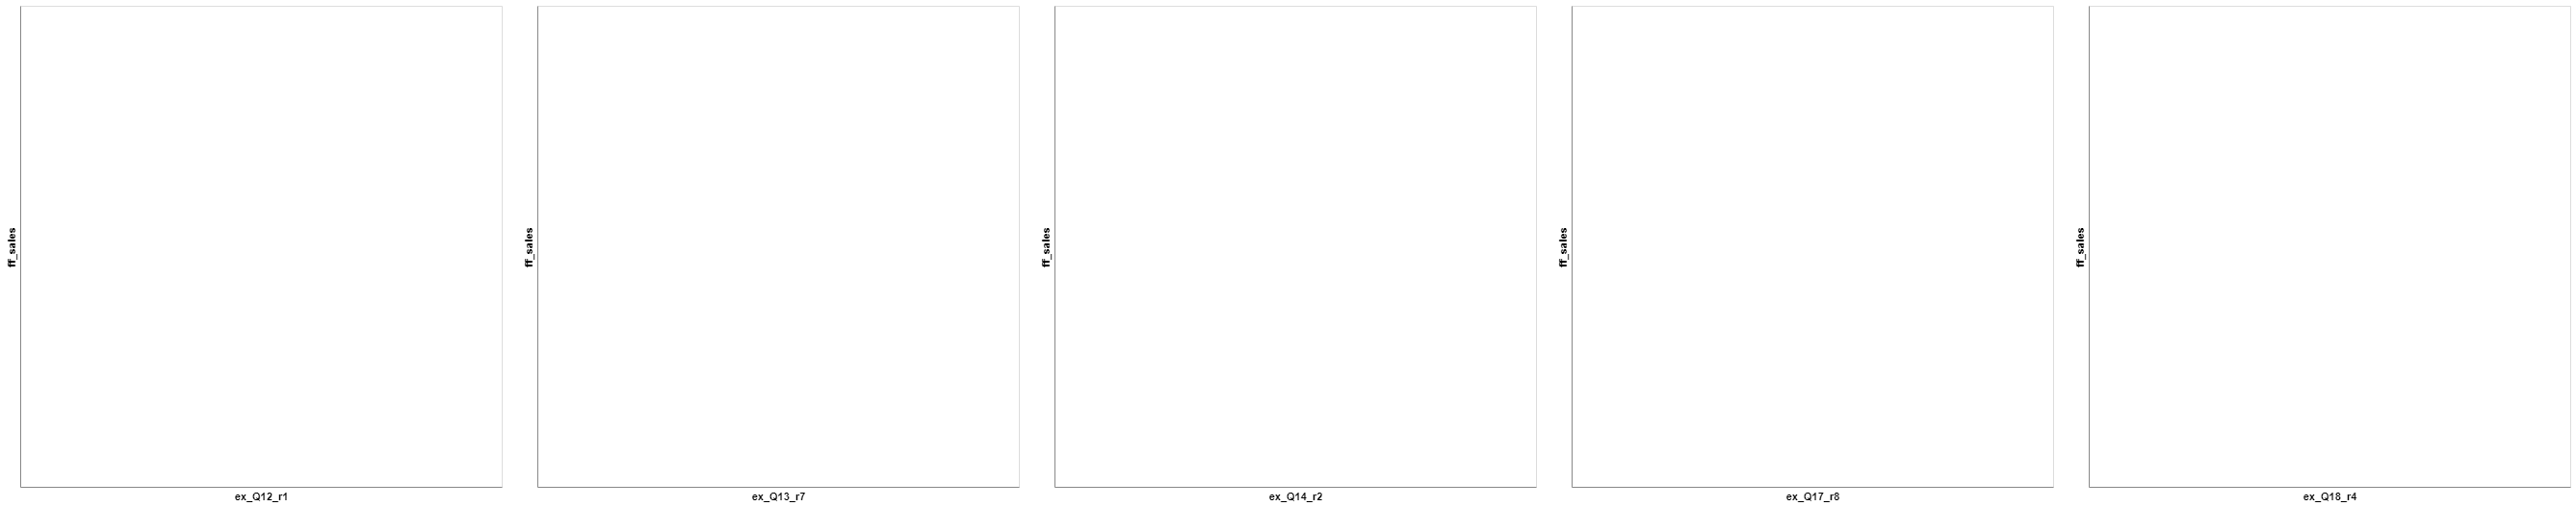

In [55]:
alt.Chart(df[significant_columns]).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=500,
    height=500
).repeat(
    row=list([target]),
    column=list(significant_columns)
)

In [9]:
corr = pd.DataFrame([pearsonr(b[i].tolist(),
                       b['MEDV'].tolist())
                     for i in b_x.columns],
                    columns=['r','p_val'],
                    index=[i for i in b_x.columns])


corr['r^2'] = (corr['r']**2).round(4)
corr['accept'] = corr['p_val'].apply(lambda x: x < .05)
corr.sort_values('r^2',ascending=False)

,r,p_val,r^2,accept
LSTAT,-0.737663,5.081103e-88,0.5441,True
RM,0.695360,2.487229e-74,0.4835,True
PTRATIO,-0.507787,1.609509e-34,0.2578,True
INDUS,-0.483725,4.900260e-31,0.2340,True
TAX,-0.468536,5.637734e-29,0.2195,True
NOX,-0.427321,7.065042e-24,0.1826,True
CRIM,-0.388305,1.173987e-19,0.1508,True
RAD,-0.381626,5.465933e-19,0.1456,True
AGE,-0.376955,1.569982e-18,0.1421,True
ZN,0.360445,5.713584e-17,0.1299,True


All of the columns here are significant `p < alpha`. 

[example of p-value hacking](https://fivethirtyeight.com/features/science-isnt-broken/#part1)

In [10]:
reg = LinearRegression().fit(b_x, b_y)
print("the coefficient of determination R^2 of the prediction: ",reg.score(b_x, b_y))

the coefficient of determination R^2 of the prediction:  0.7406426641094094


Running a very simple model to to examine which features contribute to 

In [11]:
b['MEDV_pred'] = reg.predict(b_x)
b['loss'] = abs(b['MEDV_pred']-b['MEDV'])
b['over under'] = b['MEDV_pred']-b['MEDV']

In [12]:
pearsonr(b['MEDV_pred'].tolist(),b['MEDV'].tolist())[0]**2

0.7406426641094089

In [13]:
b['loss'].mean()

3.2708628109003164

A quick look at the model winners. Overall a good model, but some homes are way over or undervalued. This will upset stakeholders and make them question how your model works. 

In [14]:
print('the BEST predictions')
b.sort_values('loss').head(10)

the BEST predictions


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_pred,loss,over under
286,0.01965,80.0,1.76,0.0,0.385,6.230,31.5,9.0892,1.0,241.0,18.2,341.60,12.93,20.1,20.101742,0.001742,0.001742
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01,12.7,12.687256,0.012744,-0.012744
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6,37.586058,0.013942,-0.013942
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,18.920262,0.020262,0.020262
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09,17.4,17.421538,0.021538,0.021538
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,13.4,13.361416,0.038584,-0.038584
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7,21.742658,0.042658,0.042658
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5,20.557386,0.057386,0.057386
333,0.05083,0.0,5.19,0.0,0.515,6.316,38.1,6.4584,5.0,224.0,20.2,389.71,5.68,22.2,22.140607,0.059393,-0.059393
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2,21.261983,0.061983,0.061983


In [15]:
print('the WORST predictions')
b.sort_values('loss',ascending=False).head(10)

the WORST predictions


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_pred,loss,over under
368,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,23.800729,26.199271,-26.199271
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,24.943313,25.056687,-25.056687
372,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,25.999809,24.000191,-24.000191
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,32.644074,17.355926,-17.355926
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9,1.718518,16.181482,-16.181482
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,37.494474,15.594474,15.594474
370,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,34.606840,15.393160,-15.393160
186,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0,35.884972,14.115028,-14.115028
161,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0,36.774670,13.225330,-13.225330
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,14.281907,13.218093,-13.218093


In [45]:
examples = [364,407]

## SHAP Values

SHAP (SHapley Additive exPlanation) values attribute to each feature the change in the
expected model prediction when conditioning on that feature. They explain how to get from the
base value `E[f(z)]` that would be predicted if we did not know any features to the current output
`f(x)`. When the model is non-linear or the input features are
not independent, however, the order in which features are added to the expectation matters, and the
SHAP values arise from averaging the `φi` values across all possible orderings.

In [46]:
explainer = shap.LinearExplainer(reg, b_x, feature_dependence="independent")
shap_values = explainer.shap_values(b_x)

In [47]:
b_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
shap_df = pd.DataFrame(explainer.attributions(b_x),columns=b_x.columns)
shap_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.389619,0.308063,-0.181466,-0.185841,0.296615,1.106254,-0.002336,-0.435229,-2.616542,1.384400,3.006426,0.374571,4.026504
1,0.387352,-0.527505,-0.083607,-0.185841,1.522511,0.519535,0.007147,-1.729449,-2.310492,2.050468,0.624558,0.374571,1.843509
2,0.387354,-0.527505,-0.083607,-0.185841,1.522511,3.430272,-0.005174,-1.729449,-2.310492,2.050468,0.624558,0.336673,4.525025
3,0.386805,-0.527505,-0.184139,-0.185841,1.717944,2.717827,-0.015765,-3.345342,-2.004443,2.297160,-0.232915,0.353434,5.097011
4,0.382843,-0.527505,-0.184139,-0.185841,1.717944,3.285497,-0.009951,-3.345342,-2.004443,2.297160,-0.232915,0.374571,3.842839


Shap values a quick way to look at the feature importance for each row in the dataset. In addition to getting a global set of values that highlight the importance of each feature, SHAP shows how each row in the dataset is impacted by each feature. This allows richer analysis. 

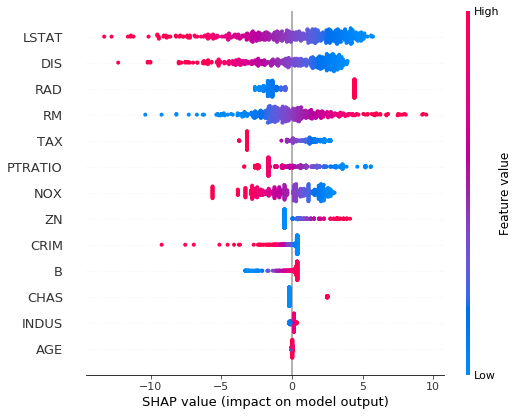

In [20]:
shap.summary_plot(shap_values, b_x)

In [21]:
shap.force_plot(explainer.expected_value, shap_values[examples[0],:], b_x.iloc[examples[0],:])


You can see here that the `output value` is just:
```
target mean + sum of shap values
```

In [22]:
b_y.mean()

MEDV    22.532806
dtype: float64

In [23]:
shap_df.loc[examples].sum(axis=1)

364    14.961668
407    -2.549858
dtype: float64

In [24]:
reg.predict(b_x.loc[examples])

array([[37.4944739 ],
       [19.98294786]])

In [25]:
shap.force_plot(explainer.expected_value, shap_values[examples[1],:], b_x.iloc[examples[1],:])

In [26]:
b_x2 = b_x.copy().rename(
    columns={c: "v_"+c for c in b_x.columns}
).merge(
    shap_df.rename(columns={c: "s_"+c for c in shap_df.columns}),
    left_index=True,right_index=True
)
b_x2['MEDV'] = b_y

b_x2.head()

,v_CRIM,v_ZN,v_INDUS,v_CHAS,v_NOX,v_RM,v_AGE,v_DIS,v_RAD,v_TAX,...,s_NOX,s_RM,s_AGE,s_DIS,s_RAD,s_TAX,s_PTRATIO,s_B,s_LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,0.296615,1.106254,-0.002336,-0.435229,-2.616542,1.384400,3.006426,0.374571,4.026504,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,1.522511,0.519535,0.007147,-1.729449,-2.310492,2.050468,0.624558,0.374571,1.843509,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,1.522511,3.430272,-0.005174,-1.729449,-2.310492,2.050468,0.624558,0.336673,4.525025,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,1.717944,2.717827,-0.015765,-3.345342,-2.004443,2.297160,-0.232915,0.353434,5.097011,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,1.717944,3.285497,-0.009951,-3.345342,-2.004443,2.297160,-0.232915,0.374571,3.842839,36.2


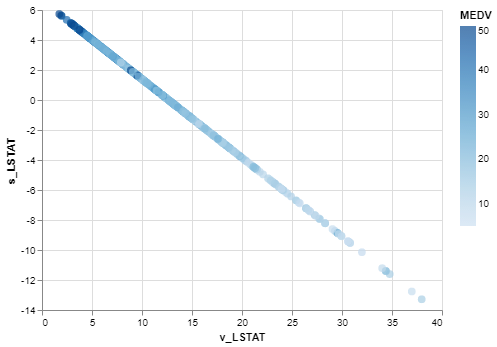

In [27]:
alt.Chart(b_x2).mark_circle(size=60).encode(
    x='v_LSTAT',
    y='s_LSTAT',
    color='MEDV'
).interactive()

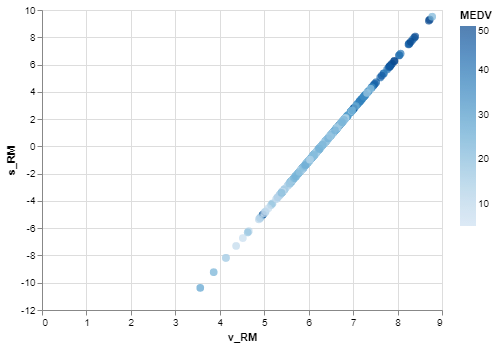

In [28]:
alt.Chart(b_x2).mark_circle(size=60).encode(
    x='v_RM',
    y='s_RM',
        color='MEDV'
).interactive()

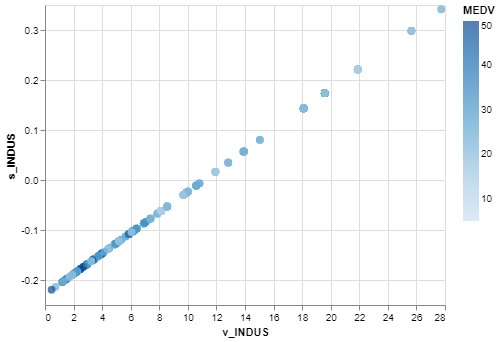

In [29]:
alt.Chart(b_x2).mark_circle(size=60).encode(
    x='v_INDUS',
    y='s_INDUS',
    color='MEDV'
).interactive()

## Example of two predictions.


In [30]:
b.loc[examples]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_pred,loss,over under
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,37.494474,15.594474,15.594474
407,11.95110,0.0,18.1,0.0,0.659,5.608,100.0,1.2852,24.0,666.0,20.2,332.09,12.13,27.9,19.982948,7.917052,-7.917052


In [31]:
b_x.loc[examples]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29
407,11.95110,0.0,18.1,0.0,0.659,5.608,100.0,1.2852,24.0,666.0,20.2,332.09,12.13


In [32]:
shap_df.loc[examples]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
364,0.015040,-0.527505,0.143154,2.500893,-2.901375,9.507007,0.009916,2.789327,4.422596,-3.1794,-1.662036,-0.019778,3.863829
407,-0.900553,-0.527505,0.143154,-0.185841,-1.853145,-2.577886,0.021753,3.703441,4.422596,-3.1794,-1.662036,-0.228919,0.274482


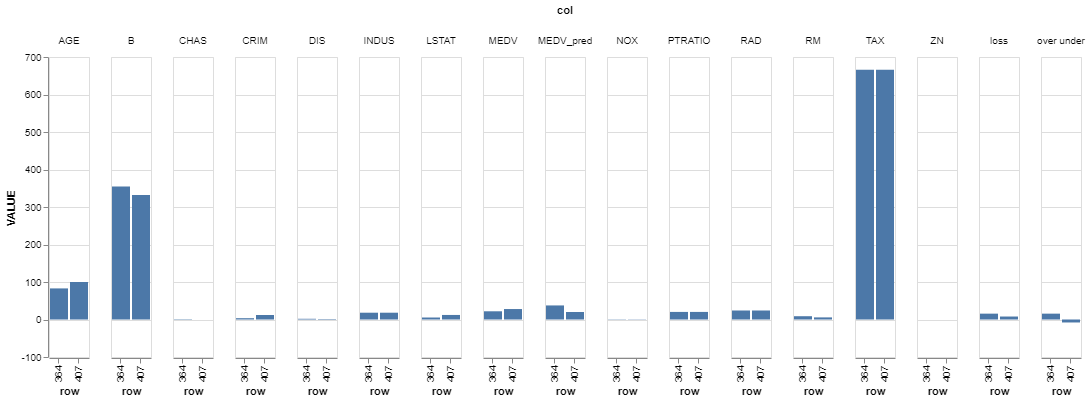

In [33]:
d = pd.DataFrame(b.loc[examples].unstack().reset_index())
d.columns = ['col','row','VALUE']
d['row'] = d['row'].apply(str)

alt.Chart(d).mark_bar().encode(
    x='row',
    y='VALUE',
    column='col',
    tooltip=['VALUE']#tooltip=list(b_x.columns)
)

In [34]:
shap_df.loc[examples]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
364,0.015040,-0.527505,0.143154,2.500893,-2.901375,9.507007,0.009916,2.789327,4.422596,-3.1794,-1.662036,-0.019778,3.863829
407,-0.900553,-0.527505,0.143154,-0.185841,-1.853145,-2.577886,0.021753,3.703441,4.422596,-3.1794,-1.662036,-0.228919,0.274482


In [35]:
shap_df.loc[examples].sum(axis=1)

364    14.961668
407    -2.549858
dtype: float64

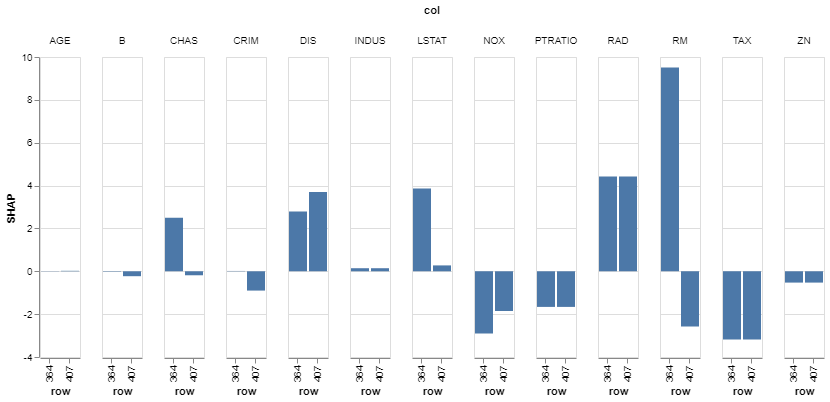

In [36]:
d = pd.DataFrame(shap_df.loc[examples].unstack().reset_index())
d.columns = ['col','row','SHAP']
d['row'] = d['row'].apply(str)

alt.Chart(d).mark_bar().encode(
    x='row',
    y='SHAP',
    column='col',
    tooltip=['SHAP']#tooltip=list(b_x.columns)
)

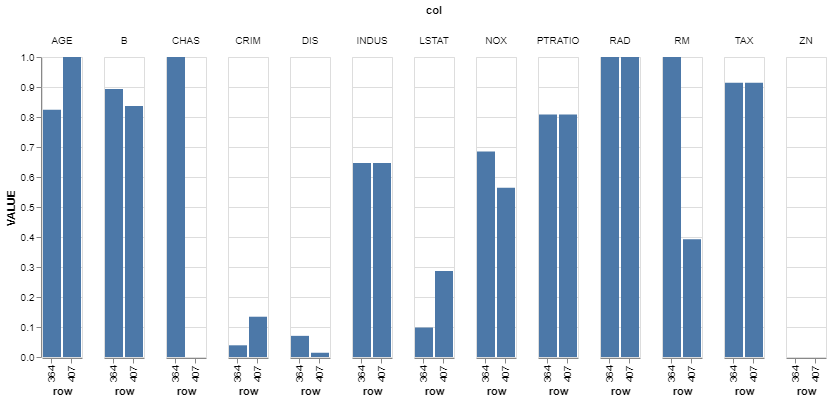

In [37]:
scaler = MinMaxScaler()

d = pd.DataFrame(MinMaxScaler().fit(b_x).transform(b_x),columns=b_x.columns).loc[examples].unstack().reset_index()
d.columns = ['col','row','VALUE']
d['row'] = d['row'].apply(str)

alt.Chart(d).mark_bar().encode(
    x='row',
    y='VALUE',
    column='col',
    tooltip=['VALUE']#tooltip=list(b_x.columns)
)

# Let's make some SHAP values by hand. 

In [38]:
b_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
b_x.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

The First step is to work out the amount over / under the mean for each value in the dataset. 

In [40]:
(b_x - b_x.mean()).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-3.607204,6.636364,-8.826779,-0.06917,-0.016695,0.290366,-3.374901,0.294957,-8.549407,-112.237154,-3.155534,40.225968,-7.673063
1,-3.586214,-11.363636,-4.066779,-0.06917,-0.085695,0.136366,10.325099,1.172057,-7.549407,-166.237154,-0.655534,40.225968,-3.513063
2,-3.586234,-11.363636,-4.066779,-0.06917,-0.085695,0.900366,-7.474901,1.172057,-7.549407,-166.237154,-0.655534,36.155968,-8.623063
3,-3.581154,-11.363636,-8.956779,-0.06917,-0.096695,0.713366,-22.774901,2.267157,-6.549407,-186.237154,0.244466,37.955968,-9.713063
4,-3.544474,-11.363636,-8.956779,-0.06917,-0.096695,0.862366,-14.374901,2.267157,-6.549407,-186.237154,0.244466,40.225968,-7.323063


[Estimated coefficients](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
for the linear regression problem.

In [41]:
pd.DataFrame(reg.coef_[0],index=b_x.columns)

,0
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


So the formula is: 

In [42]:
((b_x - b_x.mean()) * reg.coef_[0]).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.389619,0.308063,-0.181466,-0.185841,0.296615,1.106254,-0.002336,-0.435229,-2.616542,1.384400,3.006426,0.374571,4.026504
1,0.387352,-0.527505,-0.083607,-0.185841,1.522511,0.519535,0.007147,-1.729449,-2.310492,2.050468,0.624558,0.374571,1.843509
2,0.387354,-0.527505,-0.083607,-0.185841,1.522511,3.430272,-0.005174,-1.729449,-2.310492,2.050468,0.624558,0.336673,4.525025
3,0.386805,-0.527505,-0.184139,-0.185841,1.717944,2.717827,-0.015765,-3.345342,-2.004443,2.297160,-0.232915,0.353434,5.097011
4,0.382843,-0.527505,-0.184139,-0.185841,1.717944,3.285497,-0.009951,-3.345342,-2.004443,2.297160,-0.232915,0.374571,3.842839


You can see that this matches the Shap scores exactly. 

In [43]:
shap_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.389619,0.308063,-0.181466,-0.185841,0.296615,1.106254,-0.002336,-0.435229,-2.616542,1.384400,3.006426,0.374571,4.026504
1,0.387352,-0.527505,-0.083607,-0.185841,1.522511,0.519535,0.007147,-1.729449,-2.310492,2.050468,0.624558,0.374571,1.843509
2,0.387354,-0.527505,-0.083607,-0.185841,1.522511,3.430272,-0.005174,-1.729449,-2.310492,2.050468,0.624558,0.336673,4.525025
3,0.386805,-0.527505,-0.184139,-0.185841,1.717944,2.717827,-0.015765,-3.345342,-2.004443,2.297160,-0.232915,0.353434,5.097011
4,0.382843,-0.527505,-0.184139,-0.185841,1.717944,3.285497,-0.009951,-3.345342,-2.004443,2.297160,-0.232915,0.374571,3.842839


In [44]:
((b_x - b_x.mean()) * reg.coef_[0]).head() == shap_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
